In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

dataset_link : "https://drive.google.com/file/d/1E_FY_vrz21zYnR4MJ0sSKfU-QERDCzki/view?usp=sharing"

In [ ]:
data=pd.read_csv("/content/heart.csv")

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


This dataset appears to be related to heart disease prediction, with various medical and demographic features :  

1. **age** – Age of the individual (numerical).  
2. **sex** – Gender of the individual (1 = Male, 0 = Female).  
3. **cp (Chest Pain Type)** – Types of chest pain experienced:  
   - 0 = Typical angina  
   - 1 = Atypical angina  
   - 2 = Non-anginal pain  
   - 3 = Asymptomatic  
4. **trestbps (Resting Blood Pressure)** – Blood pressure in mm Hg when the patient is at rest.  
5. **chol (Serum Cholesterol)** – Cholesterol level in mg/dl.  
6. **fbs (Fasting Blood Sugar)** – Whether fasting blood sugar is > 120 mg/dl (1 = True, 0 = False).  
7. **restecg (Resting Electrocardiographic Results)** – Results of ECG at rest:  
   - 0 = Normal  
   - 1 = Having ST-T wave abnormality  
   - 2 = Showing probable or definite left ventricular hypertrophy  
8. **thalach (Maximum Heart Rate Achieved)** – Maximum heart rate recorded during a stress test.  
9. **exang (Exercise-Induced Angina)** – Whether the patient experiences angina (chest pain) during exercise (1 = Yes, 0 = No).  
10. **oldpeak (ST Depression Induced by Exercise)** – ST depression measured from rest to peak exercise, indicating ischemia.  
11. **slope (Slope of the Peak Exercise ST Segment)** – Describes the shape of the ST segment in ECG:  
   - 0 = Upsloping  
   - 1 = Flat  
   - 2 = Downsloping  
12. **ca (Number of Major Vessels Colored by Fluoroscopy)** – Number of major vessels (0-3) detected.  
13. **thal (Thalassemia Test Result)** –  
   - 1 = Normal  
   - 2 = Fixed defect (no proper blood flow in some part of the heart)  
   - 3 = Reversible defect (a blood flow issue that can be corrected)  
14. **target (Heart Disease Presence)** – The output label:  
   - 1 = Heart disease present  
   - 0 = No heart disease  


In [ ]:
data.shape

(1025, 14)

The dataset have 1025 rows and 14 clinical column

In [ ]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Univariate Analysis

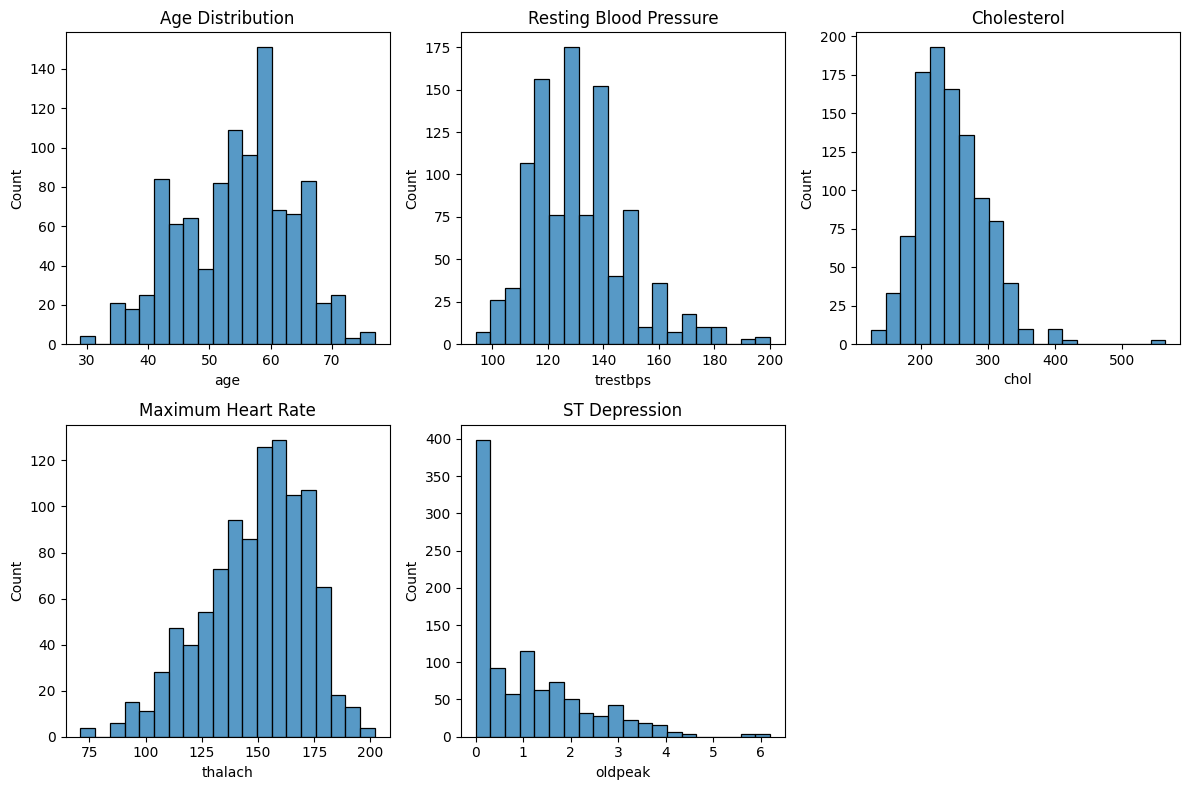

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
sns.histplot(data['age'], bins=20)
plt.title('Age Distribution')

plt.subplot(2, 3, 2)
sns.histplot(data['trestbps'], bins=20)
plt.title('Resting Blood Pressure')

plt.subplot(2, 3, 3)
sns.histplot(data['chol'], bins=20)
plt.title('Cholesterol')

plt.subplot(2, 3, 4)
sns.histplot(data['thalach'], bins=20)
plt.title('Maximum Heart Rate')

plt.subplot(2, 3, 5)
sns.histplot(data['oldpeak'], bins=20)
plt.title('ST Depression')

plt.tight_layout()
plt.show()

Visualize the distribution of categorical variables:


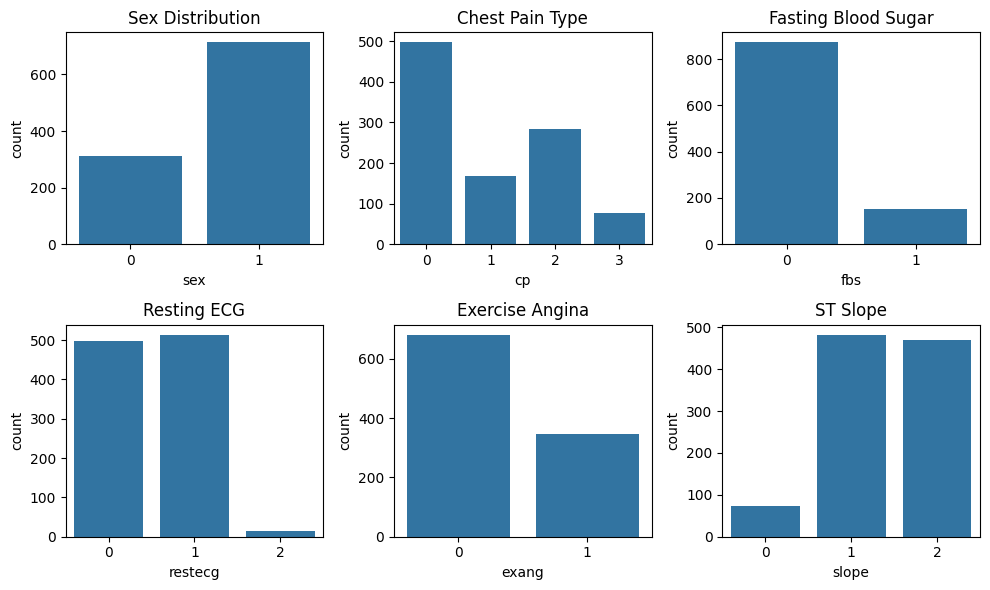

In [ ]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 3, 1)
sns.countplot(x='sex', data=data)
plt.title('Sex Distribution')

plt.subplot(2, 3, 2)
sns.countplot(x='cp', data=data)
plt.title('Chest Pain Type')

plt.subplot(2, 3, 3)
sns.countplot(x='fbs', data=data)
plt.title('Fasting Blood Sugar')

plt.subplot(2, 3, 4)
sns.countplot(x='restecg', data=data)
plt.title('Resting ECG')

plt.subplot(2, 3, 5)
sns.countplot(x='exang', data=data)
plt.title('Exercise Angina')

plt.subplot(2, 3, 6)
sns.countplot(x='slope', data=data)
plt.title('ST Slope')

plt.tight_layout()
plt.show()

Visualize the target variable:


<ipython-input-10-67cfcc2798e9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=data,palette='Set2')


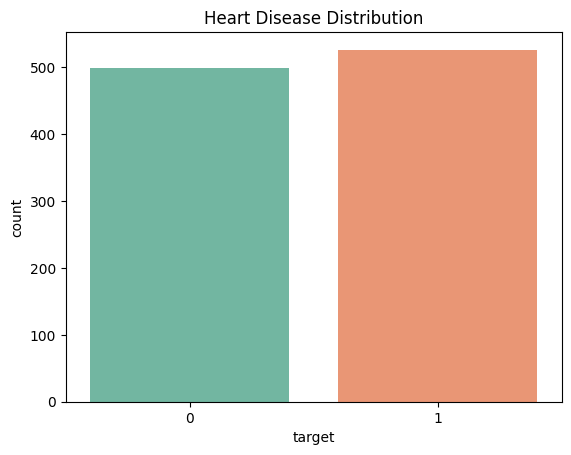

In [ ]:
sns.countplot(x='target', data=data,palette='Set2')
plt.title('Heart Disease Distribution')
plt.show()

In [ ]:
# bivariate

In [ ]:
Heart_disease_present = data['target'].value_counts().get(1, 0)  # Get count for target = 1, default to 0 if not found
No_heart_disease = data['target'].value_counts().get(0, 0)  # Get count for target = 0, default to 0 if not found

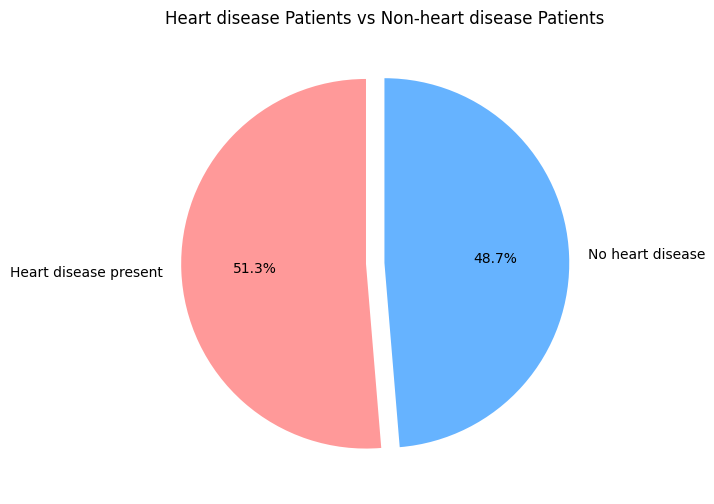

In [ ]:

# Data for the pie chart
labels = ['Heart disease present', 'No heart disease']
sizes = [Heart_disease_present, No_heart_disease]
colors = ['#ff9999', '#66b3ff']  # Color scheme
explode = (0.1, 0)  # To slightly separate the heart patients slice

# Create Pie Chart
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, explode=explode, startangle=90)
plt.title("Heart disease Patients vs Non-heart disease Patients")
plt.show()

It is observed that from the given dataset, 51.3 % of the data belongs to heart_disease_patients whereas 48.7 % belongs to No_heart_disease Patients.

In [ ]:
data['target'].value_counts()

,count
target,
1,526
0,499


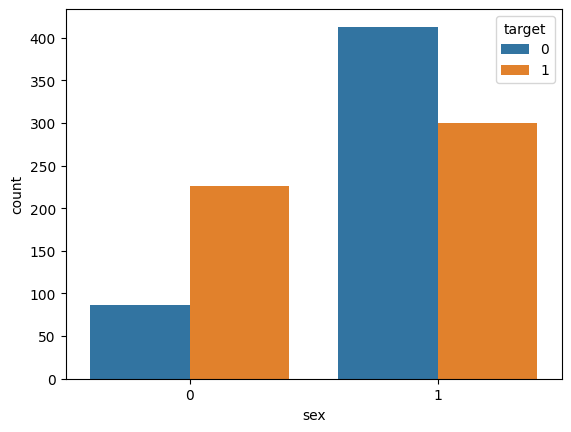

In [ ]:
sns.countplot(data=data,x='sex', hue='target')
plt.show()

In [ ]:
print(data['sex'].value_counts())

sex
1    713
0    312
Name: count, dtype: int64


In [ ]:
Femalepatients = data[(data.sex == 0) & (data.target == 1)]
Femalepatients

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
10,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
12,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
16,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
992,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1004,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1
1014,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1


Number of female heart patients are 226 out of 312 Females

In [ ]:
Male_patients = data[(data.sex == 1) & (data.target == 1)]
Male_patients

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
19,58,1,2,140,211,1,0,165,0,0.0,2,0,2,1
22,45,1,0,104,208,0,0,148,1,3.0,1,0,2,1
26,44,1,2,130,233,0,1,179,1,0.4,2,0,2,1
34,50,1,2,129,196,0,1,163,0,0.0,2,0,2,1
36,51,1,3,125,213,0,0,125,1,1.4,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1
1008,42,1,1,120,295,0,1,162,0,0.0,2,0,2,1
1011,45,1,1,128,308,0,0,170,0,0.0,2,0,2,1
1019,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1


Number of male heart patients are 300 out of 713 males

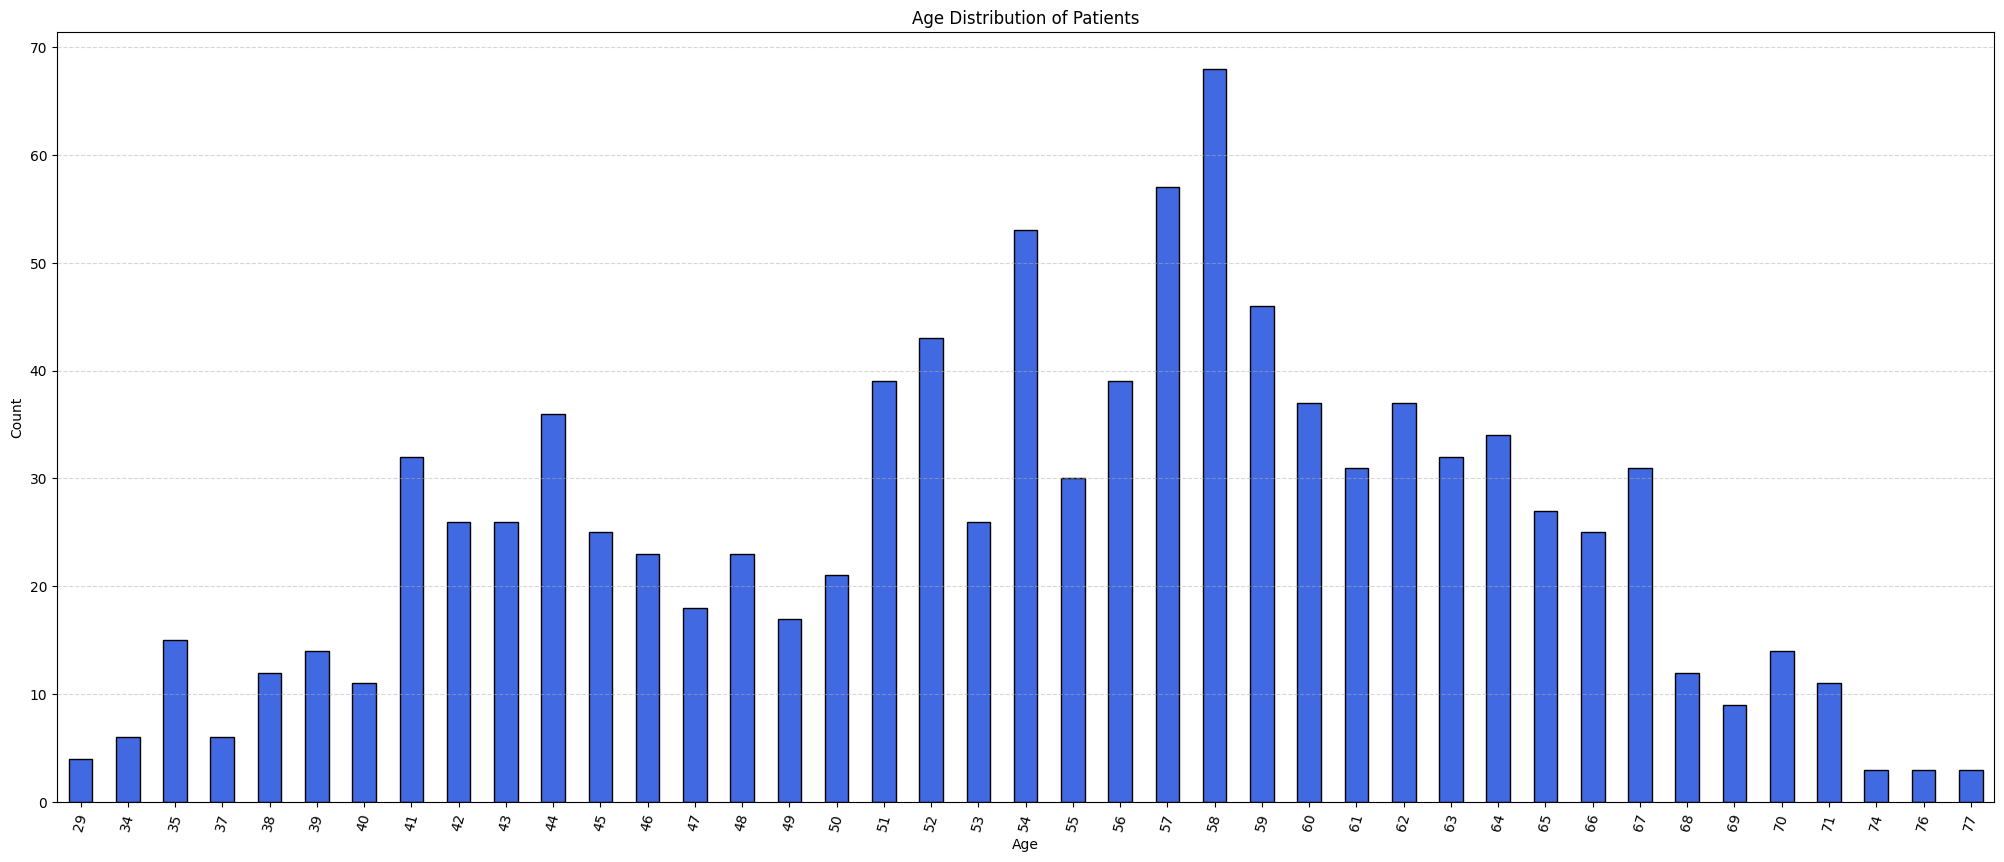

In [ ]:
# Plot the age group distribution
plt.figure(figsize=(25,10))
data['age'].value_counts().sort_index().plot(kind='bar', color='royalblue', edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution of Patients")
plt.xticks(rotation=75)  # Rotating labels to prevent overlap
plt.grid(axis='y', linestyle="--", alpha=0.5)
plt.show()

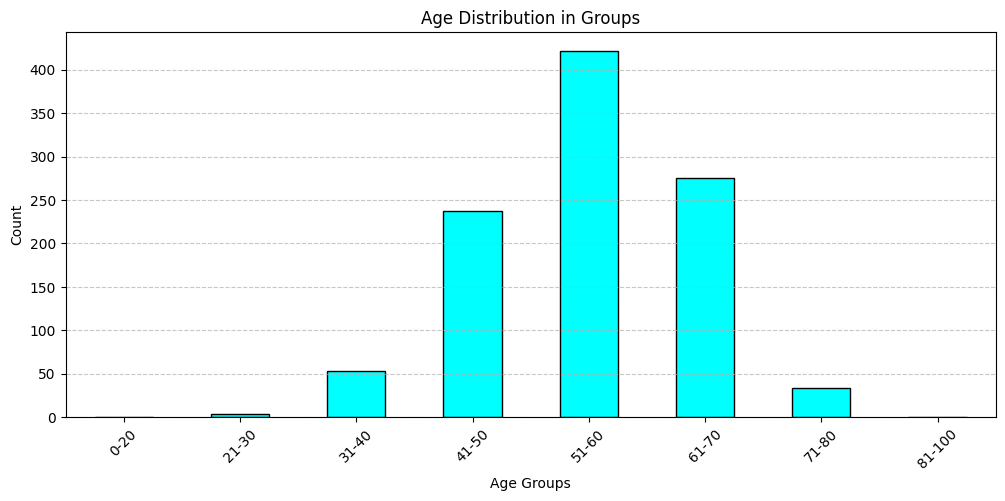

In [ ]:
# Define age bins
bins = [0, 20, 30, 40, 50, 60, 70, 80, 100]  # Customize as needed
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-100']

# Create a new column for age groups
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

# Plot the age group distribution
plt.figure(figsize=(12,5))
data['age_group'].value_counts().sort_index().plot(kind='bar', color='Cyan', edgecolor='black')
plt.xlabel("Age Groups")
plt.ylabel("Count")
plt.title("Age Distribution in Groups")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
data.drop(['age_group'],inplace = True , axis =1)

**Bivariate Analysis**



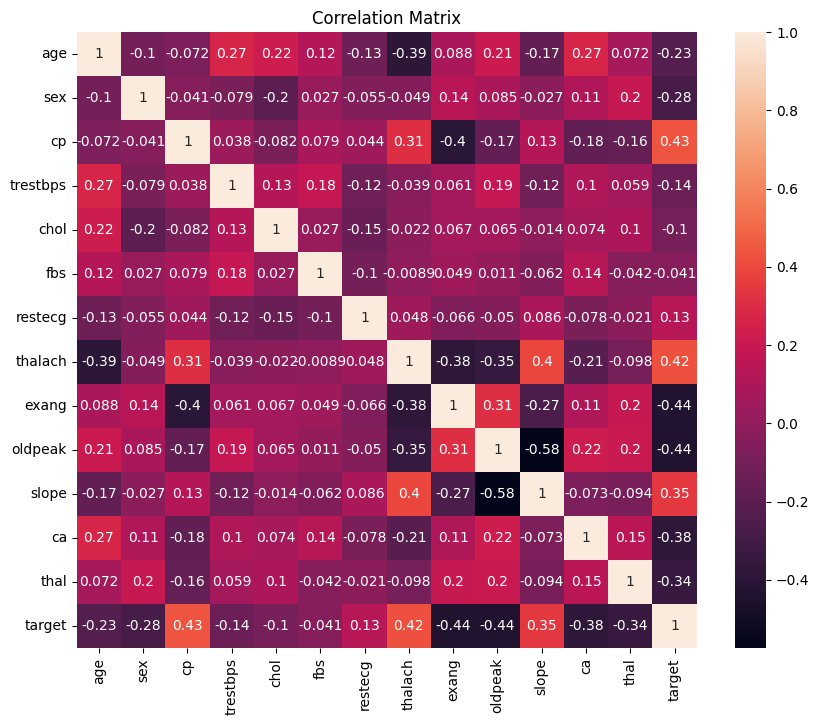

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

Relationship between age and maximum heart rate:

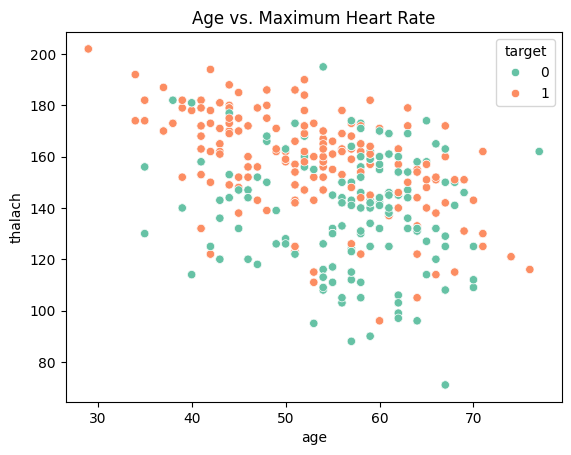

In [ ]:
sns.scatterplot(x='age', y='thalach', data=data, hue='target',palette='Set2')
plt.title('Age vs. Maximum Heart Rate')
plt.show()

Relationship between chest pain type and heart disease:

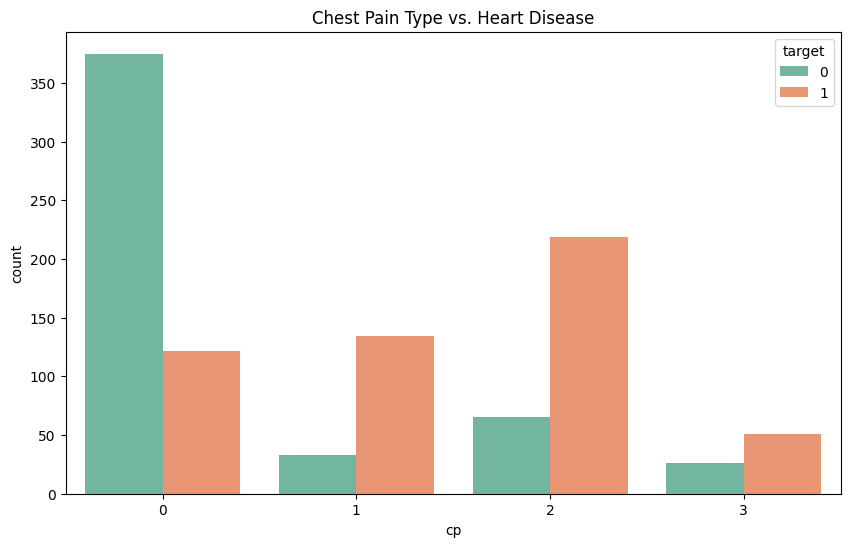

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='cp', hue='target', data=data,palette='Set2')
plt.title('Chest Pain Type vs. Heart Disease')
plt.show()

In [ ]:
data['ca'].value_counts()

,count
ca,
0,578
1,226
2,134
3,69
4,18


Interaction between Age and Target (Heart Disease Presence):

<ipython-input-26-ffb02d68012b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='age', data=data, palette='Set2')


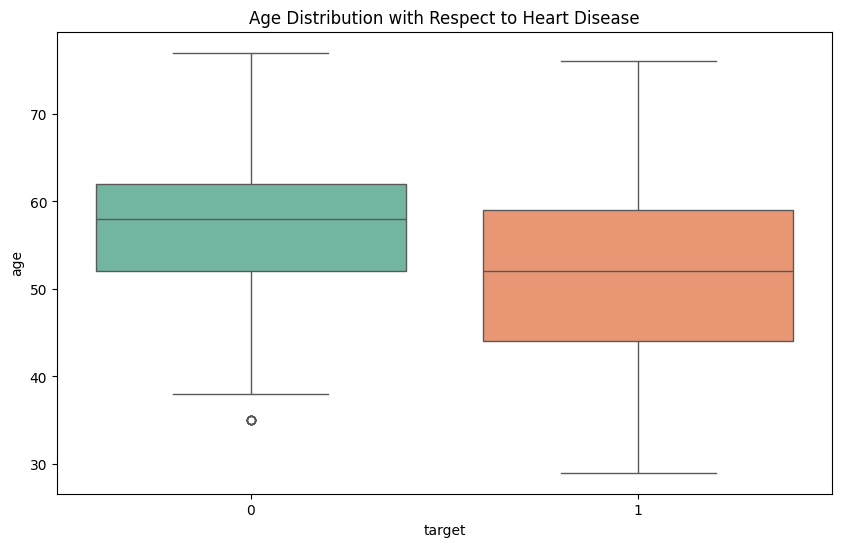

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='age', data=data, palette='Set2')
plt.title('Age Distribution with Respect to Heart Disease')
plt.show()


Maximum Heart Rate (thalach) vs Exercise Induced Angina (exang):

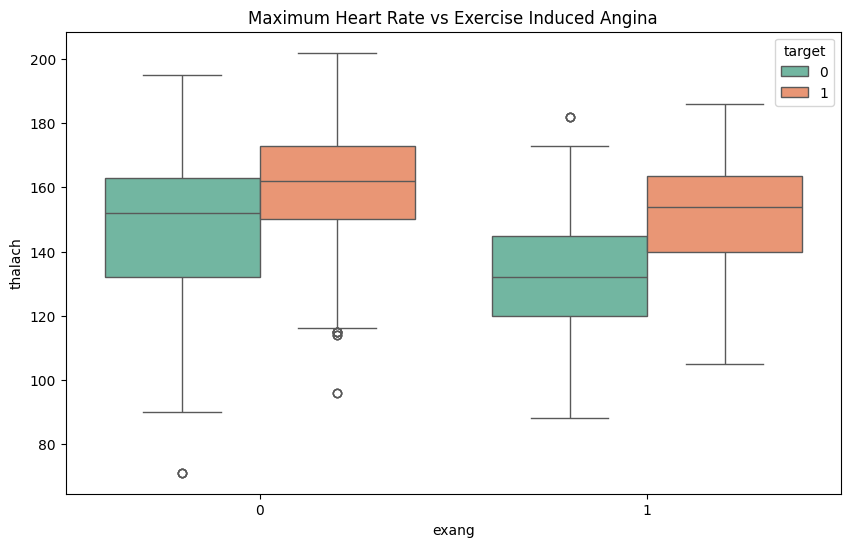

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='exang', y='thalach', hue='target', data=data, palette='Set2')
plt.title('Maximum Heart Rate vs Exercise Induced Angina')
plt.show()


Cholesterol vs Fasting Blood Sugar (fbs):

<ipython-input-28-58dbc364bfe7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='fbs', y='chol', data=data, palette='Set2')


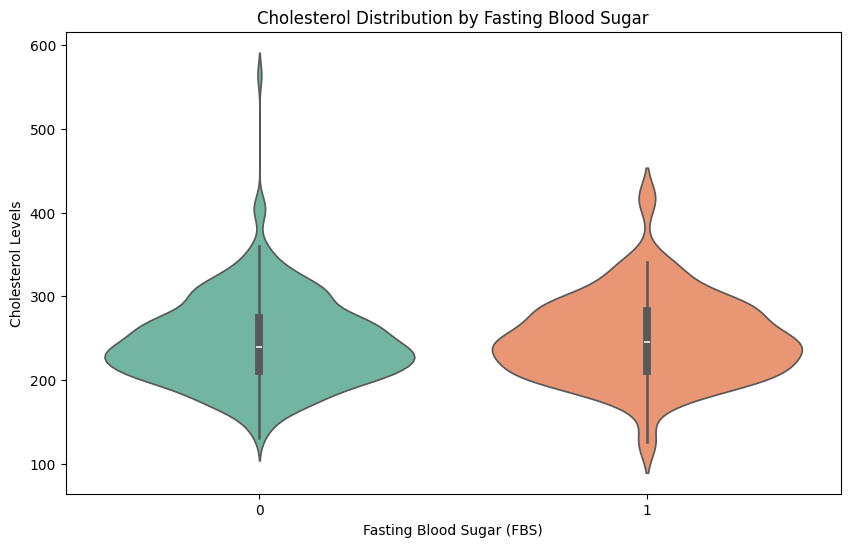

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='fbs', y='chol', data=data, palette='Set2')
plt.title('Cholesterol Distribution by Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar (FBS)')
plt.ylabel('Cholesterol Levels')
plt.show()


 Oldpeak vs Slope

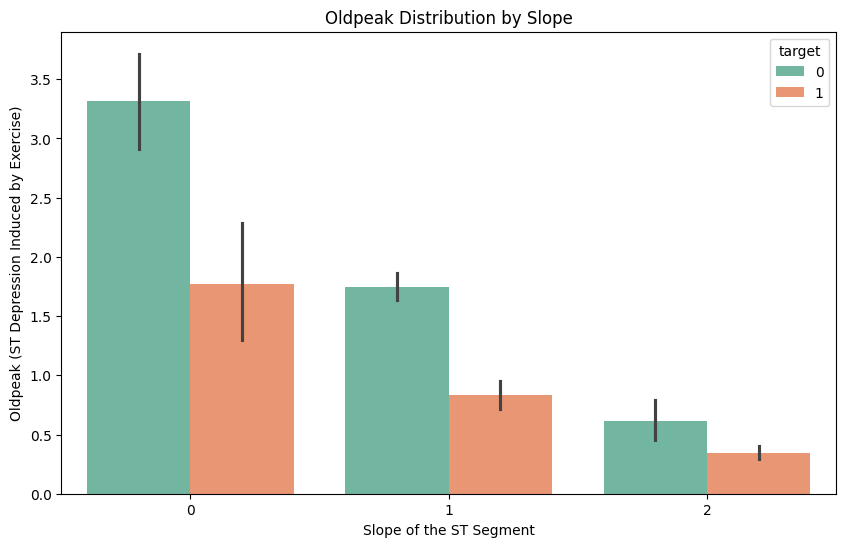

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='slope', y='oldpeak', hue='target', data=data, palette='Set2')
plt.title('Oldpeak Distribution by Slope')
plt.xlabel('Slope of the ST Segment')
plt.ylabel('Oldpeak (ST Depression Induced by Exercise)')
plt.show()


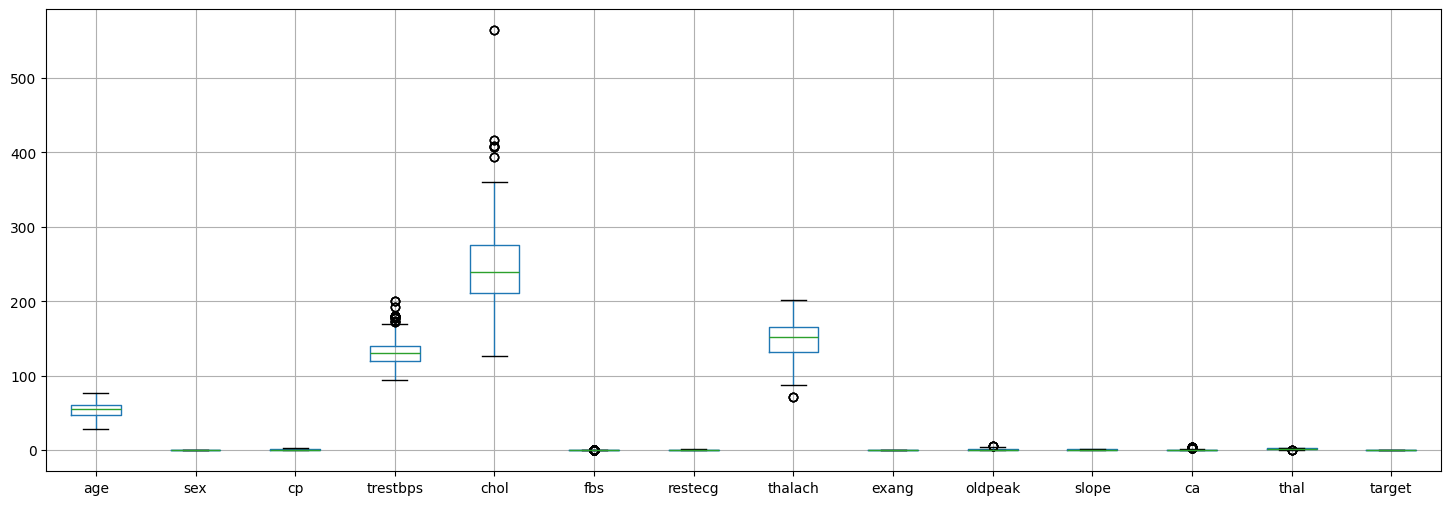

In [ ]:
#cheking the outliers
plt.figure(figsize=(18, 6))
data.boxplot()
plt.show()

In [ ]:
#Treating the outlier

def ot(data,col):
  Q3=data[col].quantile(0.75)
  Q1=data[col].quantile(0.25)
  IQR=Q3-Q1
  UB=Q3+1.5*IQR
  LB=Q1-1.5*IQR
  upper_ot=data[col]>UB
  lower_ot=data[col]<LB
  data.loc[upper_ot,col]=data[col].median()
  data.loc[lower_ot,col]=data[col].median()
  return data

In [ ]:
for i in data.select_dtypes(include=['int64','float64']):
  ot(data,i)

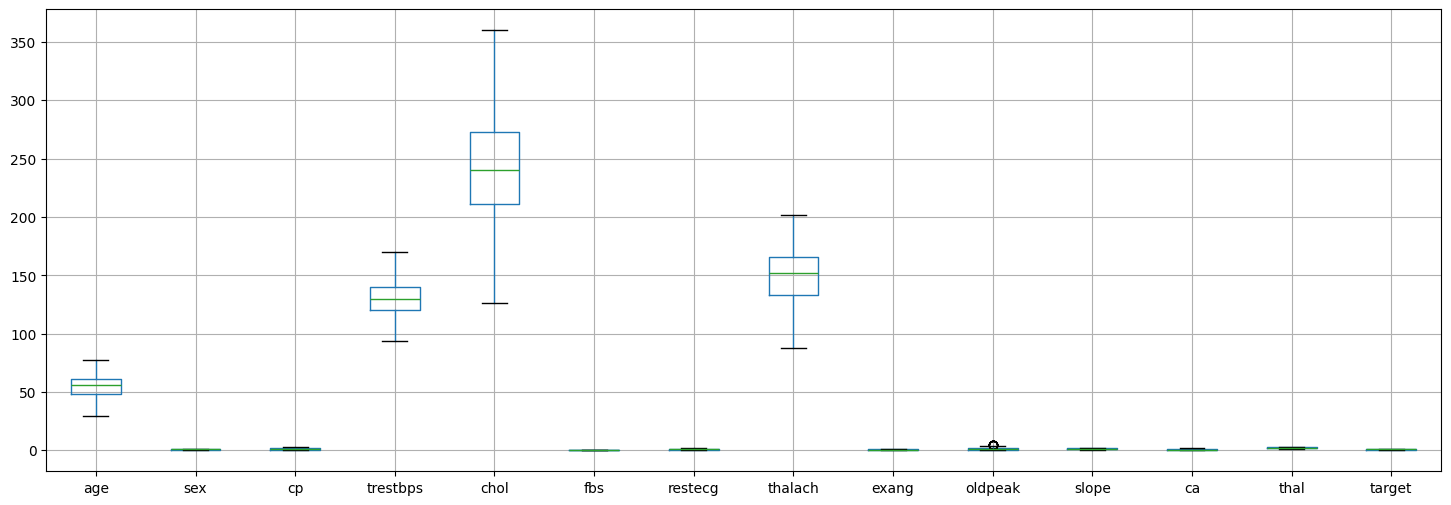

In [ ]:
#cheking the outliers
plt.figure(figsize=(18, 6))
data.boxplot()
plt.show()

In [ ]:
#checking skewness
data.skew()

,0
age,-0.248866
sex,-0.851449
cp,0.529455
trestbps,0.265765
chol,0.203290
fbs,0.000000
restecg,0.180440
thalach,-0.428708
exang,0.692655
oldpeak,0.985010


In [ ]:
data['oldpeak'] = np.log1p(data['oldpeak'])

In [ ]:
data.skew()

,0
age,-0.248866
sex,-0.851449
cp,0.529455
trestbps,0.265765
chol,0.203290
fbs,0.000000
restecg,0.180440
thalach,-0.428708
exang,0.692655
oldpeak,0.315959


### **Model prepration**

In [ ]:
y = data["target"]
X = data.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Before applying algorithm we should check whether the data is equally splitted or not, because if data is not splitted equally it will cause for data imbalacing problem

In [ ]:
print(y_test.unique())
Counter(y_train)

[1 0]


Counter({1: 419, 0: 401})

In [ ]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[82 16]
 [ 9 98]]


Accuracy of Logistic Regression: 87.8048780487805 

              precision    recall  f1-score   support

           0       0.90      0.84      0.87        98
           1       0.86      0.92      0.89       107

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



In [ ]:
m2 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=2,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[ 90   8]
 [  2 105]]


Accuracy of Random Forest: 95.1219512195122 

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        98
           1       0.93      0.98      0.95       107

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



In [ ]:
m3 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[85 13]
 [ 8 99]]


Accuracy of K-NeighborsClassifier: 89.75609756097562 

              precision    recall  f1-score   support

           0       0.91      0.87      0.89        98
           1       0.88      0.93      0.90       107

    accuracy                           0.90       205
   macro avg       0.90      0.90      0.90       205
weighted avg       0.90      0.90      0.90       205



In [ ]:
m4 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[ 94   4]
 [  4 103]]


Accuracy of DecisionTreeClassifier: 96.09756097560975 

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        98
           1       0.96      0.96      0.96       107

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205



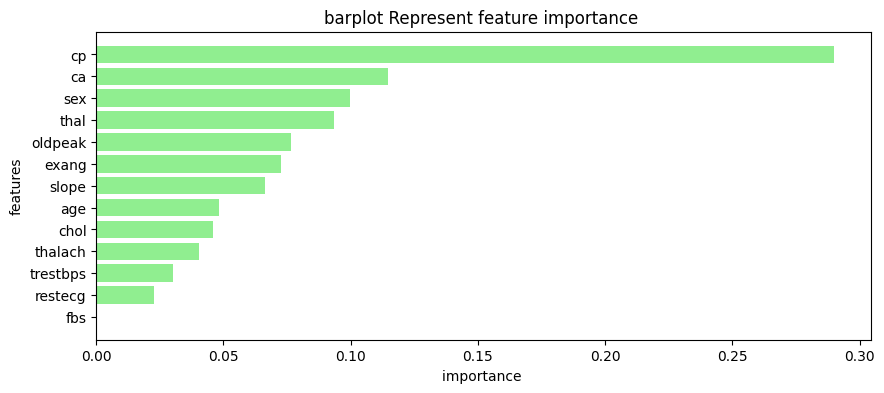

In [ ]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'], 'Importance': xgb.feature_importances_})

imp_feature = imp_feature.sort_values(by='Importance', ascending=True)
plt.figure(figsize=(10,4))
plt.title("barplot Represent feature importance ")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(imp_feature['Feature'],imp_feature['Importance'],color="lightgreen")
plt.show()




<Axes: title={'center': 'has_heart_disease --- Model: Decision Tree --- Accuracy: 0.96098'}>

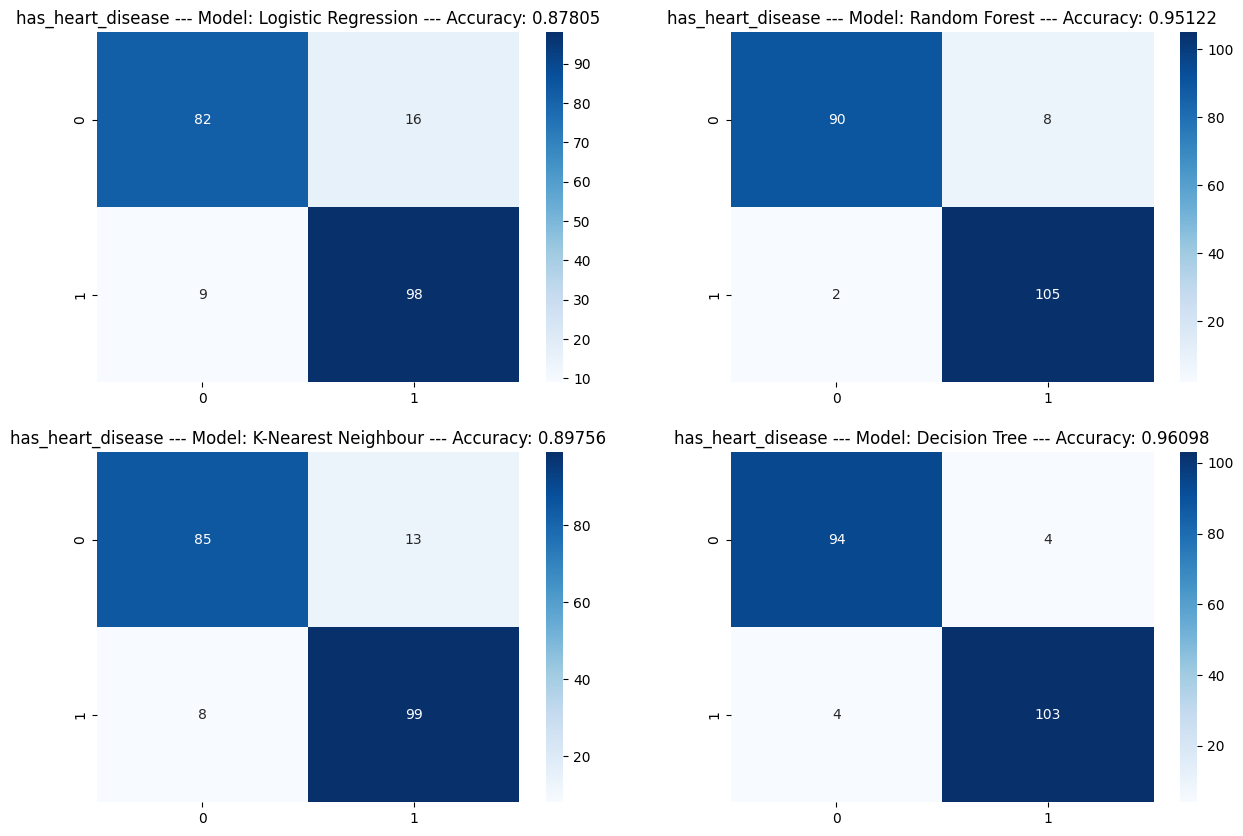

In [ ]:
plt.figure(figsize=(15,10))

# Logistic Regression
plt.subplot(2, 2, 1)
plt.title(f'has_heart_disease --- Model: Logistic Regression --- Accuracy: {lr_acc_score:.5f}')
sns.heatmap(lr_conf_matrix, annot=True, cmap="Blues", fmt="d")

# Random Forest
plt.subplot(2, 2, 2)
plt.title(f'has_heart_disease --- Model: Random Forest --- Accuracy: {rf_acc_score:.5f}')
sns.heatmap(rf_conf_matrix, annot=True, cmap="Blues", fmt="d")

# K-Nearest Neighbor
plt.subplot(2, 2, 3)
plt.title(f'has_heart_disease --- Model: K-Nearest Neighbour --- Accuracy: {knn_acc_score:.5f}')
sns.heatmap(knn_conf_matrix, annot=True, cmap="Blues", fmt="d")

# Decision Tree
plt.subplot(2, 2, 4)
plt.title(f'has_heart_disease --- Model: Decision Tree --- Accuracy: {dt_acc_score:.5f}')
sns.heatmap(dt_conf_matrix, annot=True, cmap="Blues", fmt="d")



### **Model Evaluation**

In [ ]:
model_ev = pd.DataFrame(
    {'Model': ['Logistic Regression','Random Forest','K-Nearest Neighbour','Decision Tree'],
     'Accuracy': [lr_acc_score*100,rf_acc_score*100,knn_acc_score*100,dt_acc_score*100]
     })

In [ ]:
model_ev

,Model,Accuracy
0,Logistic Regression,87.804878
1,Random Forest,95.121951
2,K-Nearest Neighbour,89.756098
3,Decision Tree,96.097561


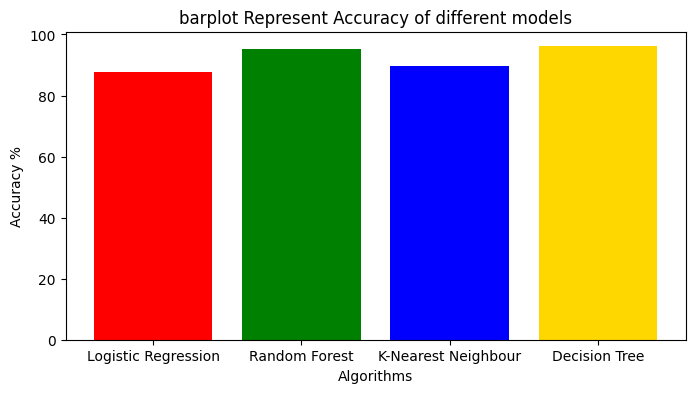

In [ ]:
colors = ['red','green','blue','gold','silver','yellow','orange',]
plt.figure(figsize=(8,4))
plt.title("barplot Represent Accuracy of different models")
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

Cross Validation score

In [ ]:
LR_Validation=cross_val_score(lr,X_train,y_train,cv=5).mean()
RF_Validation=cross_val_score(rf,X_train,y_train,cv=5).mean()
KNN_Validation=cross_val_score(knn,X_train,y_train,cv=5).mean()
DT_Validation=cross_val_score(dt,X_train,y_train,cv=5).mean()

In [ ]:
print("Cross validation Score Summary:")
print("Logistic Regression Accuracy: ",LR_Validation*100)
print("Random Forest Accuracy: ",RF_Validation*100)
print("KNN Accuracy: ",KNN_Validation*100)
print("Decision Tree Accuracy: ",DT_Validation*100)

Cross validation Score Summary:
Logistic Regression Accuracy:  84.87804878048782
Random Forest Accuracy:  91.58536585365853
KNN Accuracy:  83.78048780487805
Decision Tree Accuracy:  91.09756097560975


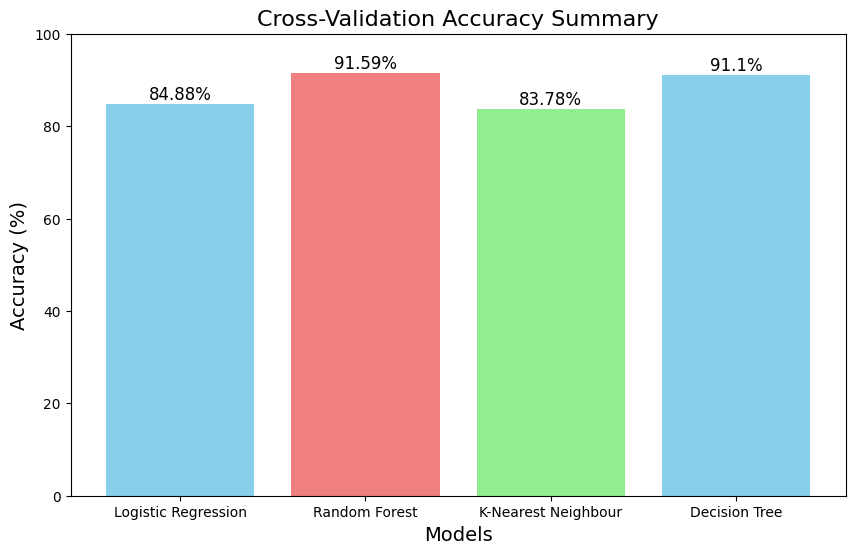

In [ ]:
CVD_Accuracies = [LR_Validation*100,RF_Validation*100,KNN_Validation*100,DT_Validation*100]

plt.figure(figsize=(10, 6))
plt.bar(model_ev['Model'], CVD_Accuracies, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Cross-Validation Accuracy Summary', fontsize=16)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.xlabel('Models', fontsize=14)
plt.ylim(0, 100)  # Set y-axis limit to 100%

for i, v in enumerate(CVD_Accuracies):
    plt.text(i, v + 1, str(round(v, 2)) + '%', ha='center', fontsize=12)

plt.show()


### Conclusion


1.   Extreme Random Forest gives the best Accuracy compared to other models
2.   Exercise induced angina,Chest pain is major symptoms of heart attack.




In summary:

- **Overall Performance**: All models (Logistic Regression, Random Forest, K-Nearest Neighbors, and Decision Tree) have high accuracy, ranging from 83.7% to 91.5%, indicating they are good at predicting heart disease.
- **Model Observations**:
  - **Logistic Regression**: 84.8% accuracy, with some misclassifications.
  - **Random Forest**: 91.5% accuracy, the most accurate model with few misclassifications.
  - **K-Nearest Neighbors**: 83.7% accuracy, with slightly more false negatives.
  - **Decision Tree**: 91.1% accuracy, similar to Random Forest with low misclassifications.

**Key Takeaways**:
- **Chest Pain Type (cp)** is the most important feature for predicting heart disease.
- **Number of Major Vessels (ca)** is the second most important feature.
- **Thallium Stress Test Result (thal)** is also a key feature.
- Other important features include **oldpeak**, **exang**, **sex**, and **slope**.

**Confusion Matrix** terms:
- **True Positives**: Correctly predicted heart disease.
- **True Negatives**: Correctly predicted no heart disease.
- **False Positives**: Incorrectly predicted heart disease.
- **False Negatives**: Incorrectly predicted no heart disease.